<a href="https://colab.research.google.com/github/FaatihFath/Praktikum---Machine-Learning/blob/main/Praktikum_5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Praktikum Machine Learning/Praktikum 5"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv(path+"//Data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


Data Preprocessing

In [ ]:
# Cek missing Value (untuk mengecek ada data yang kosong atau tidak)
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [ ]:
# cek data duplikat
df.duplicated().sum()

np.int64(7308)

In [ ]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Cek duplicate ulang
df.duplicated().sum()

np.int64(0)

In [ ]:
# mengubah nama kolom

df = df.rename(columns = {
    'Jenis Kelamin' : 'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)' : 'tinggi_cm',
    'Berat Badan (kg)' : 'berat_kg',
    'Stunting' : 'stunting',
    'Wasting' : 'wasting'

})

In [ ]:
# mengecek nama kolom yang diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


Data Understanding

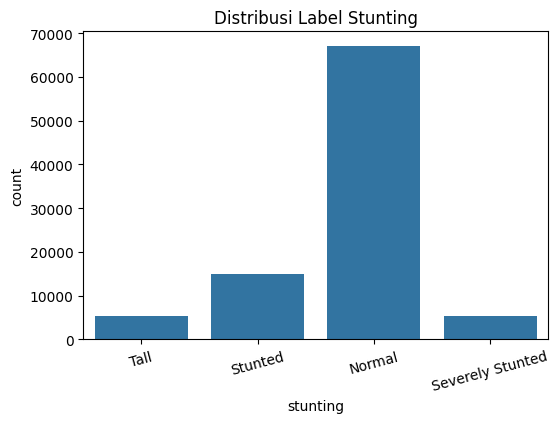

In [ ]:
#Visualisasi Distribusi label Target (Stunting)

plt.figure(figsize=(6, 4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi Label Stunting')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# Encoding data kategorial (Mapping label ke kode numerik)

# Mapping Label -> Model untuk Target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories) # urutan kelas
df['stunting'] = stunting_cat.cat.codes              # y Numerik

# fitur kategorial lain (jenis kelamin, wasting) > kode juga
for col in ['jenis_kelamin', 'wasting'] : # Corrected 'wasting' to 'Wasting'
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


Analisis korelasi antar fitur

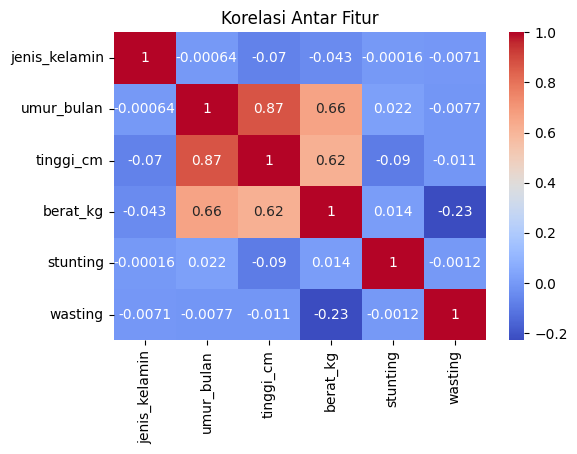

In [ ]:
# Korelasi

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

Splitting Data (Membagi data Training dan Testing)

In [ ]:
# Memilih fitur dan target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'jenis_kelamin', 'wasting']
x = df[feature_cols]
y = df['stunting']



In [ ]:
# Membagi Dataset
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )
len(x_train), len(x_test)

(74153, 18539)

Pembuatan Model Decission Tree

In [ ]:
# Membagi Model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Evaluasi Model Decission Tree

In [ ]:
# evaluasi
y_pred = dt.predict(x_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("Confussion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classsification Report:\n", classification_report(y_test, y_pred, target_names=stunting_classes))

Akurasi: 77.68 %
Confussion Matrix:
 [[12903     0   481    27]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  934     0     0   119]]
Classsification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.82      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



Visualisasi model Decission Tree

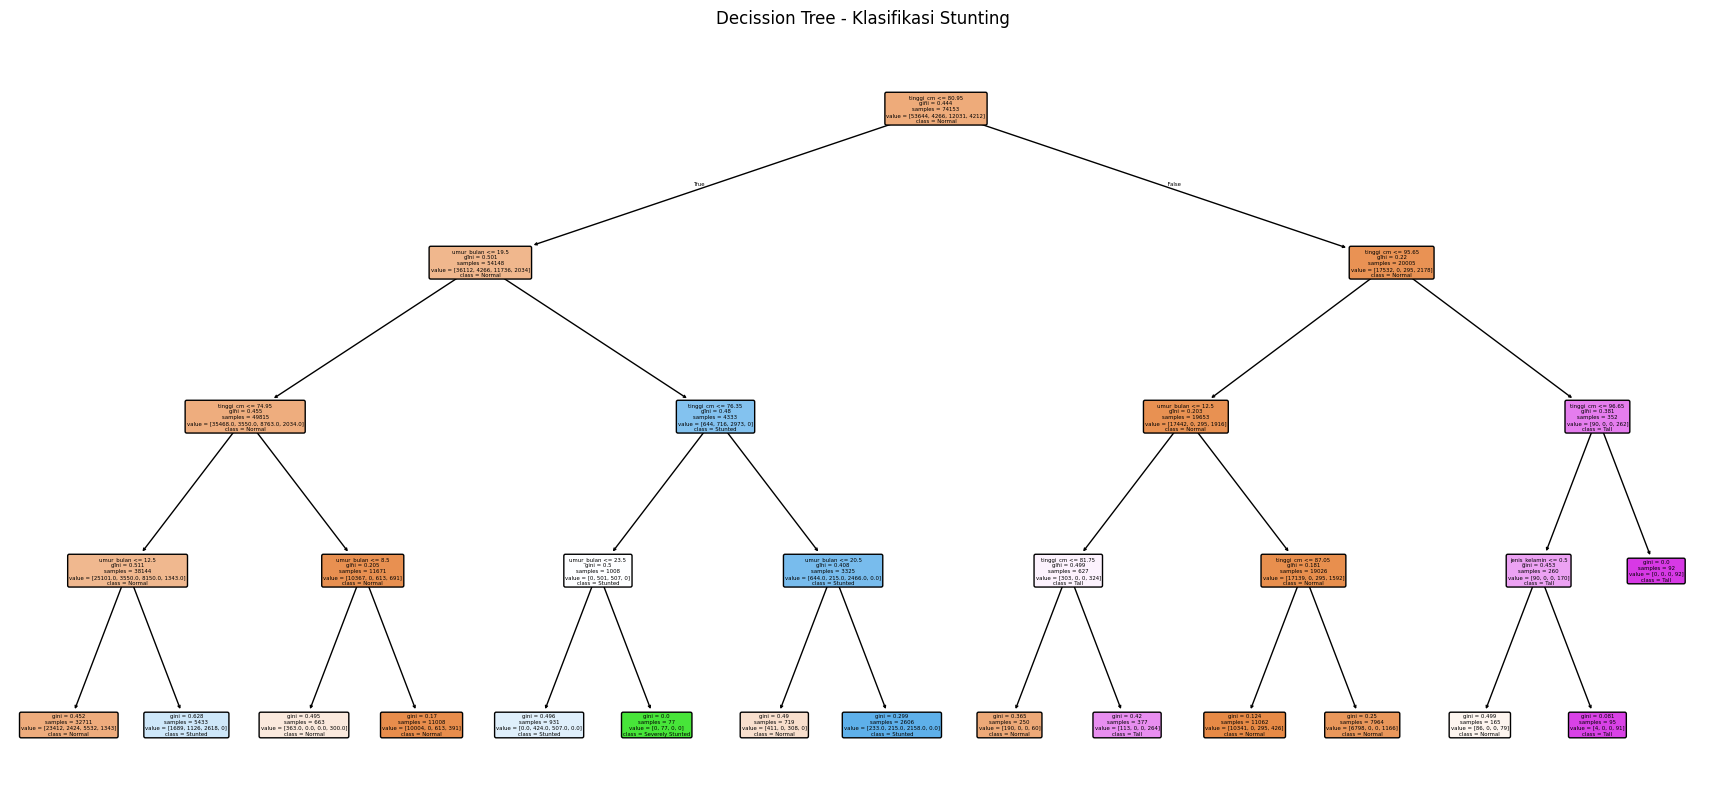

In [ ]:
# Visualisasi Model
plt.figure(figsize=(22, 10))
plot_tree(dt, feature_names=feature_cols, class_names=stunting_classes, filled=True, rounded=True)
plt.title("Decission Tree - Klasifikasi Stunting")
plt.show()

Feature Importance

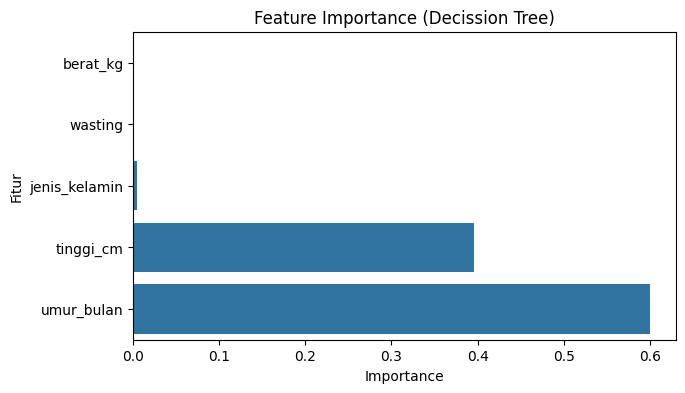

,0
berat_kg,0.000000
wasting,0.000000
jenis_kelamin,0.003834
tinggi_cm,0.395906
umur_bulan,0.600261


In [ ]:
# Fitur penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=True)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decission Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

Hyperparameter Tuning

In [ ]:
# Menentukan Max_depth Terbaik

scores = {}
for d in range(2, nine :=  9):
  m = DecisionTreeClassifier(max_depth = d, random_state=42)
  m.fit(x_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(x_test))

  scores
  best_d = max(scores, key=scores.get)
  print("Max_depth Terbaik:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")


Max_depth Terbaik: 2 | Acc: 75.72 %
Max_depth Terbaik: 2 | Acc: 75.72 %
Max_depth Terbaik: 4 | Acc: 77.68 %
Max_depth Terbaik: 5 | Acc: 78.54 %
Max_depth Terbaik: 6 | Acc: 81.85 %
Max_depth Terbaik: 7 | Acc: 83.2 %
Max_depth Terbaik: 8 | Acc: 85.72 %
